# Project 1: Dynamic Programming

### Group 6
### Eunsun Choi
### Heejin Kook
### Juneyoung Kim
### Yugyeong Ji

Please read all instructions carefully before attempting each part of the problem. Each team only needs to have one submission with all the names of team-members and group number at the beginning of the jupyter notebook.

The jupyter notebook should contain your code, discussions, derivations, analysis and relevant figures. Make sure the code and plots shown in your file can be reproduce when I rerun the code in grading. Feel free to add or move Cells.

In this project, you will solve the Frozen Lake decision-making problem using dynamic programming approaches. To do this, you will first define an MDP corresponding to the Frozen Lake environment, then implement the value and policy iteration algorithms to solve the MDP you have designed. Finally, you will compare the performance of these methods with different parameters.

## 1. The Frozen Lake Environment

The Frozen Lake decision-making problem involves crossing a frozen lake from Start(S) to Goal(G) without falling
into any Holes(H) by walking over the Frozen(F) lake (Figure 1). The agent may not always move in the intended
direction due to the slippery nature of the frozen lake. The frozen lake environment is shown in Figure 1 which is
a 4x4 grid of cells. At the beginning of each episode, the agent starts at top left corner $(s_0)$ and the objective is
to reach the goal located at bottom right corner. At each cell, the agent can choose one of the left, right, up, or
down directions and moves to the corresponding adjacent cell or other adjacent cells due to the slippery nature of
the frozen lake.

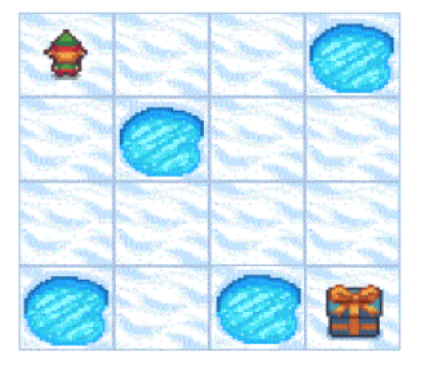

The probability of moving to the taken direction is twice of sum of all other available directions and the other
available directions are equiprobable. For example, at the top left corner, the available directions are right and
down. If the right direction is taken, the probability of transition to the right cell is 2/3 and down cell is 1/3 and
vice versa if the down direction is taken. If the agent reaches the holes (H), the mission is failed and the episode is
terminated.

### 1.1 MDP Implementation [28 Marks]

#### 1.Model the navigation problem described above as an MDP.

**(a) Define the state $(S)$ and action spaces $(A)$. [hint: The action space may not be the same for all states.]
[2 Marks]**

$S = \{ s_0, s_1, s_2, s_3, s_4, s_5, s_6, s_7, s_8, s_9, s_{10}, s_{11}, s_{12}, s_{13}, s_{14}, s_{15} \}$



**(b) Derive the probability transition function ($P$). [2 Marks]**

There are four available actions of the agents: $ \{ \text{up}, \text{down}, \text{left}, \text{right} \}$

However, the position of agents determines the number of actions it can take, which affects the state transition probability.

1. When an agent can take two actions: $s_0, s_3, s_{12}, s_{15}$
    * Probability of moving in the taken direction: $\dfrac{2}{3}$
    * Probability of moving in other directions: $\dfrac{1}{3}$ 

2. When an agent can take three actions: $s_{1}, s_{2}, s_{4}, s_{7}, s_{8}, s_{11}, s_{13}, s_{14}$
    * Probability of moving in the taken direction: $\dfrac{1}{2}$
    * Probability of moving in other alternative directions: $\dfrac{1}{4}$ 

3. When an agent can take four actions: $s_5, s_6, s_9, s_{10}$
    * Probability of moving in the taken direction: $\dfrac{2}{5}$
    * Probability of moving in other alternative directions: $\dfrac{1}{5}$ 


**(c) Define one sparse and one dense reward function. Explain your answer. [hint: One example of a sparse
reward is that one only values the agent if it reaches the goal.] [2 Marks]**

1. Sparse reward function
    * Sparse reweard function is a reward function that gives reward to few state or action.
    * Since our goal for the agent is to reach the Goal state without reaching the Hole state, one sparse reward function could be to reward the agent when it reaches the Goal state and penalize it when it reaches the Hole state.

        * $+50$ when the agent reach the Goal state ($s_{15}$)
        * $-10$ when the agent reach the Hole state ($s_3, s_5, s_{12}, s_{14}$)
        * The equation is as follows:

            $R(s) =\begin{cases} +50, & \text{if } s = s_{15} \text{ (Goal state)} \\
            -10, & \text{if } s \in \{s_3, s_5, s_{12}, s_{14}\} \text{ (Hole states)} \\
            0, & \text{otherwise}\end{cases}$

2. Dense reward function
    * On the other hand, dense reward is a reward function that rewards most of the state or action.
    * In this case, we can penalize agent whenever it move to help it learn to take the shortest path.

        * $+50$ when the agent reach the Goal state ($s_{15}$)
        * $-10$ when the agent reach the Hole state ($s_3, s_5, s_{12}, s_{14}$)
        * $-1$ when the agent move.
        * The equation is as follows:

            $R(s, a) =\begin{cases} +50, & \text{if } s = s_{15} \text{ (Goal state)} \\
            -10, & \text{if } s \in \{s_3, s_5, s_{12}, s_{14}\} \text{ (Hole states)} \\
            -1, & \text{if the agent moves} \\
            0, & \text{otherwise}\end{cases}$


#### 4.Now, you are asked to implement the Frozen Lake MDP you defined above in code. Fill the missing details of $\texttt{FrozenLakeEnv}$ class in the attached Python notebook.

(a) reset() resets the environment to the initial state ($s_0$) and returns it. You must call this function at the beginning of every episode. [2 Marks]

(b) states_space() and actions_space(state) returns the state space and action space corresponding to the given action respectively. [2 Marks]

(c) pr(state, action, next_state) returns the probability of next_state given the current state and action [4 Marks]

(d) sparse_reward(state, action, next_state) and dense_reward(state, action, next_state) returns the sparse and dense reward corresponding to the given state, action and next_state. (you may not use all arguments passed to these functions). [4 Marks]

(e) step(action) performs the given action in the MDP and returns the next_state, sparse_reward, dense_reward and a boolean variable, terminated, indicates whether the episode is terminated. [6 Marks]

In [23]:
import numpy as np

GOAL = 50
HOLE = -10

class FrozenLakeEnv:

    def __init__(self):
        # all states (format: tup)
        self.states = [(i, j) for i in range(4) for j in range(4)]
        self.holes_pos = [(0,3), (1,1), (3,0), (3,2)]   # holes position
        self.goal_pos = (3,3)   # goal position
        self.init_pos = (0,0)   # init position
        self.cur_state = self.init_pos  # current state
        self.actions = ['LEFT', 'RIGHT', 'UP', 'DOWN']  # all actions

    # return the initial state of this MDP ...
    def reset(self):
        self.cur_state = self.init_pos
        return self.cur_state
        
    # return a list containing all the possible states in this MDP
    def states_space(self):
        return self.states

    # return a list containing all the possible actions corresponding to the given state
    def actions_space(self, state):
        valid_actions = self.actions.copy()
        r, c = state
        
        if r == 0:
            valid_actions.remove('UP')
        if r == 3:
            valid_actions.remove('DOWN')
        if c == 0:
            valid_actions.remove('LEFT')
        if c == 3:
            valid_actions.remove('RIGHT')

        return valid_actions

    # sparse reward function
    def sparse_reward(self, state, action, next_state): # return R(s, a, s’)
        if next_state in self.holes_pos:
            return HOLE
        elif next_state ==  self.goal_pos:
            return GOAL
        else:
            return 0

    # dense reward function
    def dense_reward(self, state, action, next_state): # return R(s, a, s’)
        distance = abs(state[0] - self.goal_pos[0]) + abs(state[1] - self.goal_pos[1])

        if next_state in self.holes_pos:
            return HOLE
        elif next_state == self.goal_pos:
            return GOAL
        else:
            return -1

    # transition probability function
    def pr(self, state, action, next_state): # return P(s’ | s, a)

        def get_state_pos(state, action):
            if action =='LEFT':
                next_state = state[0], state[1] - 1
            elif action == 'RIGHT':
                next_state = state[0], state[1] + 1
            elif action == 'UP':
                next_state = state[0] - 1, state[1]
            elif action == 'DOWN':
                next_state = state[0] + 1, state[1]
            return next_state

        valid_actions = self.actions_space(state)
        # print("valid_actions:", valid_actions)
        
        # validation
        # out of index
        if next_state not in self.states:
            return 0.0
        
        if action not in valid_actions:
            return 0.0

        # action probabiltiy (intended / unintended)
        intended_next_state = get_state_pos(state, action)
        valid_next_state = [get_state_pos(state, a) for a in valid_actions]

        intended_prob = 2 * ( 1 / (len(valid_actions) + 1))     # intended
        unintended_prob = 1 / (len(valid_actions) + 1 )            # unintended
        
        assert intended_prob + (unintended_prob * (len(valid_actions) - 1)) == 1

        if next_state == intended_next_state:
            return intended_prob

        elif ( next_state != intended_next_state ) and ( next_state in valid_next_state ):
            return unintended_prob
        
        else:
            return 0.0

    # performs the given action in the MDP
    def step(self, action):
        """
        Argument:
            action (str)
        Returns:
            next_state (tuple)
            sparse_reward (float)
            dense_reward (float)
            terminated (bool)

        """
        # return: next_state, sparse_reward, dense_reward, terminated
        valid_actions = self.actions_space(self.cur_state)
        if action not in valid_actions:
            return self.cur_state, 0, 0, False

        all_probs = {
            next_state: self.pr(self.cur_state, action, next_state) for next_state in self.states
        }

        valid_states = [str(s) for s, p in all_probs.items() if p > 0]
        valid_probs = [p for p in all_probs.values() if p > 0]

        next_state = np.random.choice(valid_states, p=np.array(valid_probs))
        next_state = eval(next_state)

        sparse_reward = self.sparse_reward(self.cur_state, action, next_state)
        dense_reward = self.dense_reward(self.cur_state, action, next_state)

        # current_state <- next_state
        self.cur_state = next_state
        terminated = True if (next_state in self.holes_pos) or (next_state == self.goal_pos) else False 
        
        return next_state, sparse_reward, dense_reward, terminated

        

### 1.2 Policy Iteration Implementation [28 Marks]

In this section, you will implement the policy iteration algorithm. Then you will find the optimal greedy policy for both sparse and dense reward function using the impelemnted algorithm. Run the policies returned by the policy iteration algorithm and verify whether the agent reaches the goal. Use plots/tables to show your work for all following parts.


1.Implement the policy iteration algorithm by filling the missing functions in the $\texttt{PolicyIteration}$ class in the attached notebook. [12 Marks]

In [13]:
import matplotlib.pyplot as plt

class PolicyIteration:
    def __init__(self, env , gamma, reward_type="sparse"):
        # initialize the domain and discount factor
        self.env = env      # frozen lake environment
        self.gamma = gamma      # discount 
        self.reward_type = reward_type
        self.directions = {
            'LEFT': '←',
            'RIGHT': '→',
            'UP': '↑',
            'DOWN': '↓'
            }

    #### need to call this to have a self.pi
    def initialize_policy(self):
        # policy iteration also requires to maintain a policy
        # initialize the policy pi_0[s] = 0 (LEFT) for all states and the value function V_0[s] = 0
        # recommend to implement the policy (self.pi) as a dictionary that maps states to actions in {LEFT, UP, RIGHT, DOWN}
        self.pi = {
            state: 'LEFT' 
            if state not in self.env.holes_pos or state == self.env.goal_pos else None 
            for state in self.env.states
            }


    def initialize_values(self):
        # you can use the corresponding procedure you defined in ValueIteration
        self.V = {state: 0.0 for state in self.env.states}
        self.V_old = None


    def compute_backup(self, state, action):
        # you can use the corresponding procedure you defined in ValueIteration
        # E{R(s, a, S’) + gamma * V_k[S’]}
        # Store original state
        if state in self.env.holes_pos:
            return HOLE
        elif state == self.env.goal_pos:
            return GOAL
        
        all_probs = {
            next_state: self.env.pr(state, action, next_state) 
            for next_state in self.env.states
        }
        
        expected_value = 0.0
        for next_state, prob in all_probs.items():
            if prob > 0:
                if self.reward_type == 'sparse':
                    reward = self.env.sparse_reward(state, action, next_state)
                elif self.reward_type == 'dense':
                    reward = self.env.dense_reward(state, action, next_state)
                is_terminal = next_state in self.env.holes_pos or next_state == self.env.goal_pos
                expected_value += prob * (reward + (0 if is_terminal else self.gamma * self.V[next_state]))
                
        return expected_value



    def greedy_action(self, state):
        # use the previous function compute_backup to return the ( # deterministic) greedy action a* = pi[s] derived from V

        best_action = None
        best_value = -np.inf

        valid_actions = self.env.actions_space(state)

        for action in valid_actions:
            action_value = self.compute_backup(state, action)
            if action_value > best_value:
                best_value = action_value
                best_action = action

        return best_action 


    def policy_evaluation_step(self, state): ## helper function for policy_evaluation
        # use this function to implement the policy evaluation
        # step for one iteration,
        # e.g. return the value V_{k+1}[s] = E[R(s, pi[s], S’) + gamma * V_k[S’]] # you should not modify self.V
        action = self.pi[state] # action
        return self.compute_backup(state, action)


    ## how can this ever converge?
    def policy_evaluation(self, tolerance=1e-3):
        # in policy evaluation, we solve V = P * (R + gamma * V) for a fixed policy by iterating
        # V_{k+1}[s] = E[R(s, pi[ s], S’) + gamma * V_k[S’]] for each state s until V_k converges uniformly
        # use this method to perform the necessary iterations until V_k[s] (self.V) converges to within the specified tolerance
        # this procedure should not return a value, but should modify self.V ...
        while True:

            delta = 0
            self.V_old = self.V.copy()

            for state in self.env.states:
                if state in self.env.holes_pos:
                    self.V[state] = HOLE
                    continue
                if state in self.env.goal_pos:
                    self.V[state] = GOAL
                    continue
                    
                self.V[state] = self.policy_evaluation_step(state)

                delta = max(delta, abs(self.V_old[state] - self.V[state]))

            if delta < tolerance:
                break



    def policy_improvement(self):
        # implement the procedure here for policy improvement,
        # e.g. pi_{k+1}[s] = argmax_a E[R(s, a, S’) + gamma * V_k[S]]

        policy_stable = True

        for state in self.env.states:

            old_action = self.pi[state]
            updated_action = self.greedy_action(state)
            self.pi[state] = updated_action
            
            if old_action != updated_action:
                policy_stable = False
        return policy_stable



    def policy_iteration(self, tolerance=1e-3, verbose=True, plot_verbose=False):
        # implement the complete policy iteration algorithm using the procedures you defined earlier
        # your method should include initialization of the policy and value function,
        # and perform each iteration of policy iteration ,
        # which includes policy evaluation followed by improvement, until the policy no longer improves
        # you should perform monitoring and plotting the value function at the initial state,
        # store , and when converged plot , the backed -up value
        # function at the initial state of the MDP according to
        # the greedy policy derived from V_k as a function of k
        # also, print the final greedy policy in the console ...
        
        self.initialize_policy()
        self.initialize_values()

        num_iter = 0
        total_values = []

        while True:
            
            num_iter += 1

            self.policy_evaluation(tolerance=tolerance)
            total_values.append(self.V[self.env.cur_state])


            print(f"Iteration: {num_iter}, init_value: {self.V[self.env.cur_state]}")

            if self.policy_improvement():
                break
        if verbose:
            print("\n::: Greedy policy :::")
            for r in range(4):
                for c in range(4):
                    if (r, c) in self.env.holes_pos:
                        print(" H ", end=" ")
                    elif (r, c) == self.env.goal_pos:
                        print(" G ", end=" ")
                    else:
                        action = self.pi.get((r, c))
                        if action:
                            print(f" {self.directions[action]} ", end=" ")
                print()

            print('\n::: Value :::')
            for r in range(4):
                for c in range(4):
                    value = self.V.get((r, c), None)
                    print(f"{np.round(value, 3):>5}", end=" | ")
                print()

        # Visualization
        if plot_verbose:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

            # Convergence plot
            ax1.plot(range(1, len(total_values) + 1), total_values, 'b-o', label="Initial State Value")
            ax1.set_xlabel("Iteration")
            ax1.set_ylabel("Value")
            ax1.set_title(f"Policy Iteration Convergence\n(γ={self.gamma}, {self.reward_type} reward)")
            ax1.grid(True, linestyle='--', alpha=0.7)
            ax1.legend()

            # Final state values heatmap
            values_matrix = np.zeros((4, 4))
            for r in range(4):
                for c in range(4):
                    values_matrix[r, c] = self.V.get((r, c), 0)

            im = ax2.imshow(values_matrix, cmap='coolwarm')
            plt.colorbar(im, ax=ax2)

            # Add value annotations
            for r in range(4):
                for c in range(4):
                    text = f"{values_matrix[r, c]:.1f}"
                    if (r, c) in self.env.holes_pos:
                        text = "HOLE"
                    elif (r, c) == self.env.goal_pos:
                        text = "GOAL"
                    ax2.text(c, r, text, ha='center', va='center')

            ax2.set_title(f'Final State Values\n(γ={self.gamma}, {self.reward_type} reward)')

            plt.tight_layout()
            plt.show()
        else:
            pass

        return self.pi, self.V, num_iter

2.Run the algorithm in the $\texttt{FrozenLakeEnv}$ using both sparse_reward and dense_reward with these two discount factors $\gamma \in \{0.9, 0.99\}$. Use $\Delta=1e^{-3}$ as tolerance. [6 Marks]

========== Sparse reward ==========
Gamma: 0.9
Iteration: 1, init_value: 0.0
Iteration: 2, init_value: -5.766280416103994
Iteration: 3, init_value: -4.124642497036618
Iteration: 4, init_value: -4.0914993597508165

::: Greedy policy :::
 →   →   ↓   H  
 ↓   H   →   ↓  
 →   →   →   ↓  
 H   ↑   H   G  

::: Value :::
-4.091 | -4.261 | -1.868 |   -10 | 
-5.115 |   -10 | 3.536 | 11.667 | 
-3.766 | -0.255 | 9.288 | 29.715 | 
  -10 | -5.115 |   -10 |    50 | 


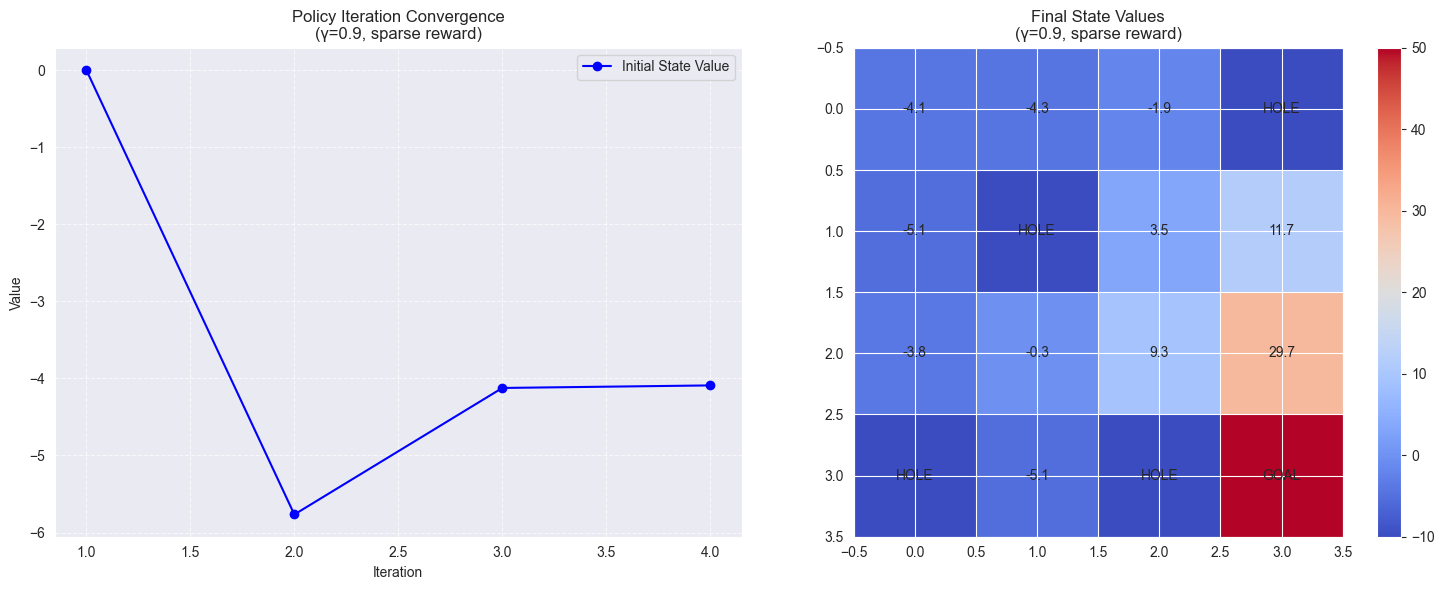

0.252190 Sec
Gamma: 0.99
Iteration: 1, init_value: 0.0
Iteration: 2, init_value: -8.256927856376679
Iteration: 3, init_value: -4.136401252299897

::: Greedy policy :::
 →   →   ↓   H  
 ↓   H   →   ↓  
 →   →   →   ↓  
 H   ↑   H   G  

::: Value :::
-4.136 | -3.728 | -0.411 |   -10 | 
-5.078 |   -10 | 6.083 | 14.639 | 
-3.14 | 1.246 | 11.958 | 31.583 | 
  -10 | -4.383 |   -10 |    50 | 


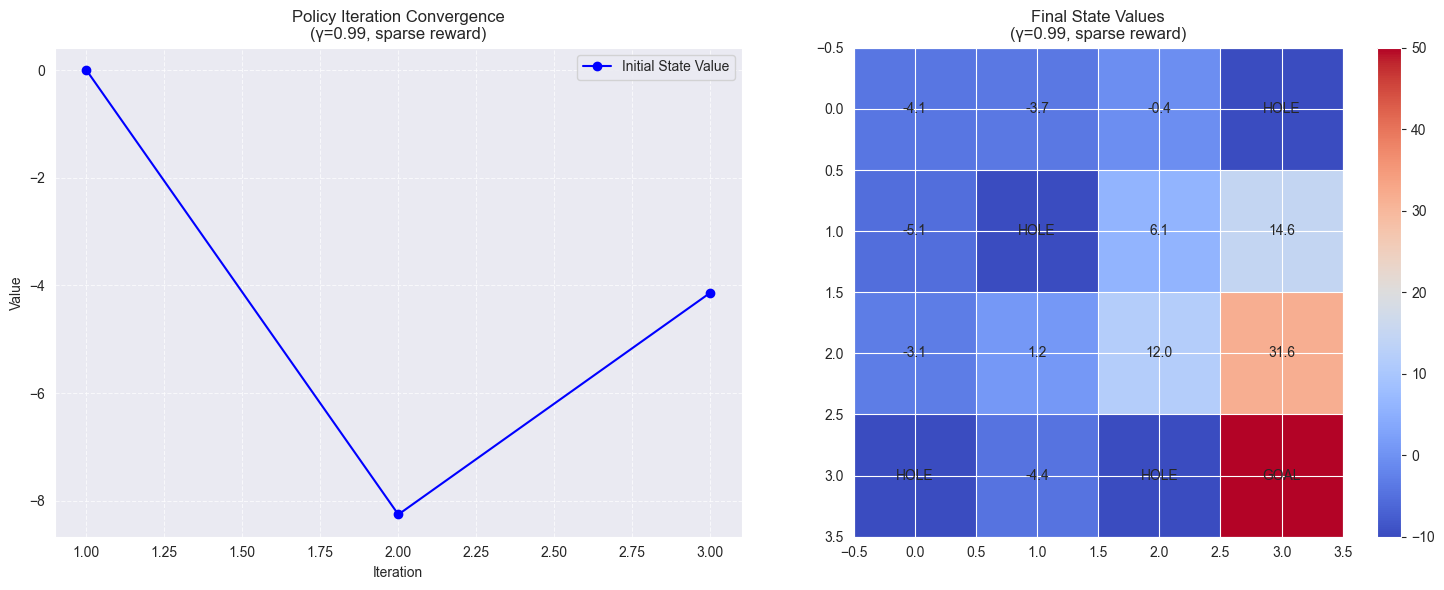

0.252027 Sec

========== Dense reward ==========
Gamma: 0.9
Iteration: 1, init_value: 0.0
Iteration: 2, init_value: -9.483596115397273
Iteration: 3, init_value: -7.384607847090027

::: Greedy policy :::
 →   →   ↓   H  
 ↓   H   →   ↓  
 →   →   →   ↓  
 H   ↑   H   G  

::: Value :::
-7.385 | -6.811 | -4.222 |   -10 | 
-7.659 |   -10 | 1.247 |  9.77 | 
-6.104 | -2.513 | 7.164 | 28.31 | 
  -10 | -6.631 |   -10 |    50 | 


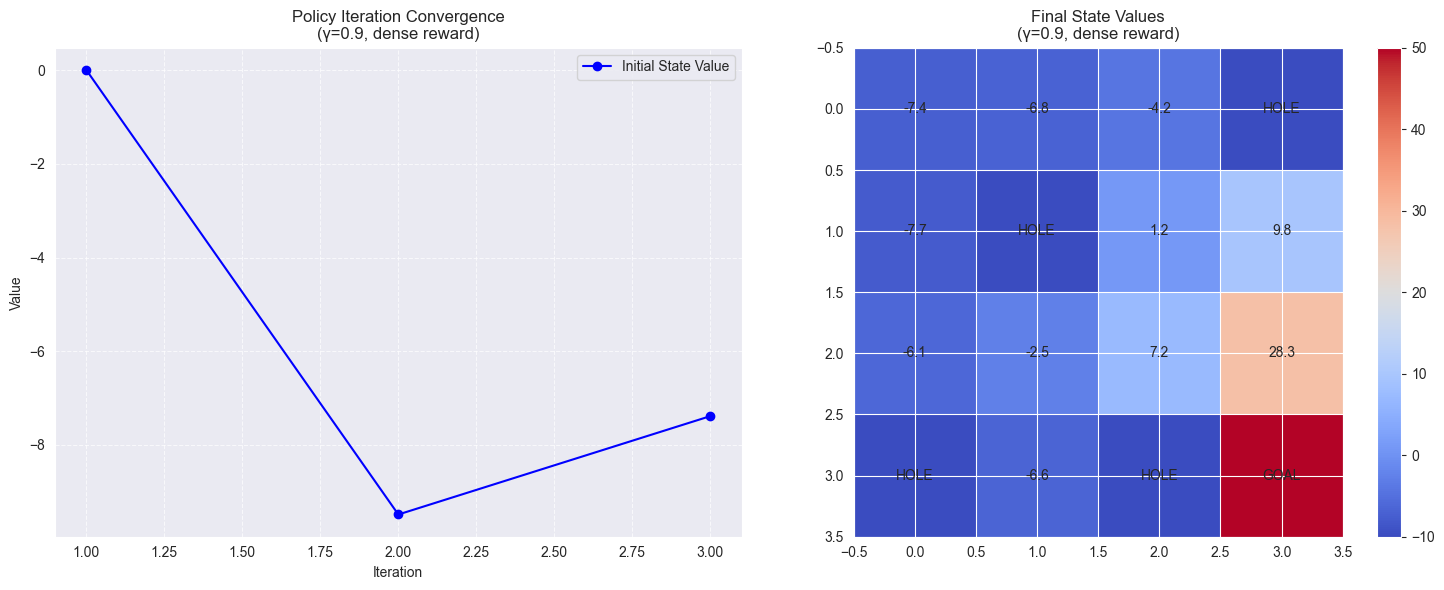

0.243011 Sec
Gamma: 0.99
Iteration: 1, init_value: 0.0
Iteration: 2, init_value: -13.40514079696896
Iteration: 3, init_value: -10.079377215529172
Iteration: 4, init_value: -8.348157838385495

::: Greedy policy :::
 →   →   ↓   H  
 ↓   H   →   ↓  
 →   →   →   ↓  
 H   ↑   H   G  

::: Value :::
-8.348 | -6.974 | -3.349 |   -10 | 
-8.317 |   -10 | 3.286 | 12.354 | 
-6.063 | -1.524 | 9.381 | 29.879 | 
  -10 | -6.254 |   -10 |    50 | 


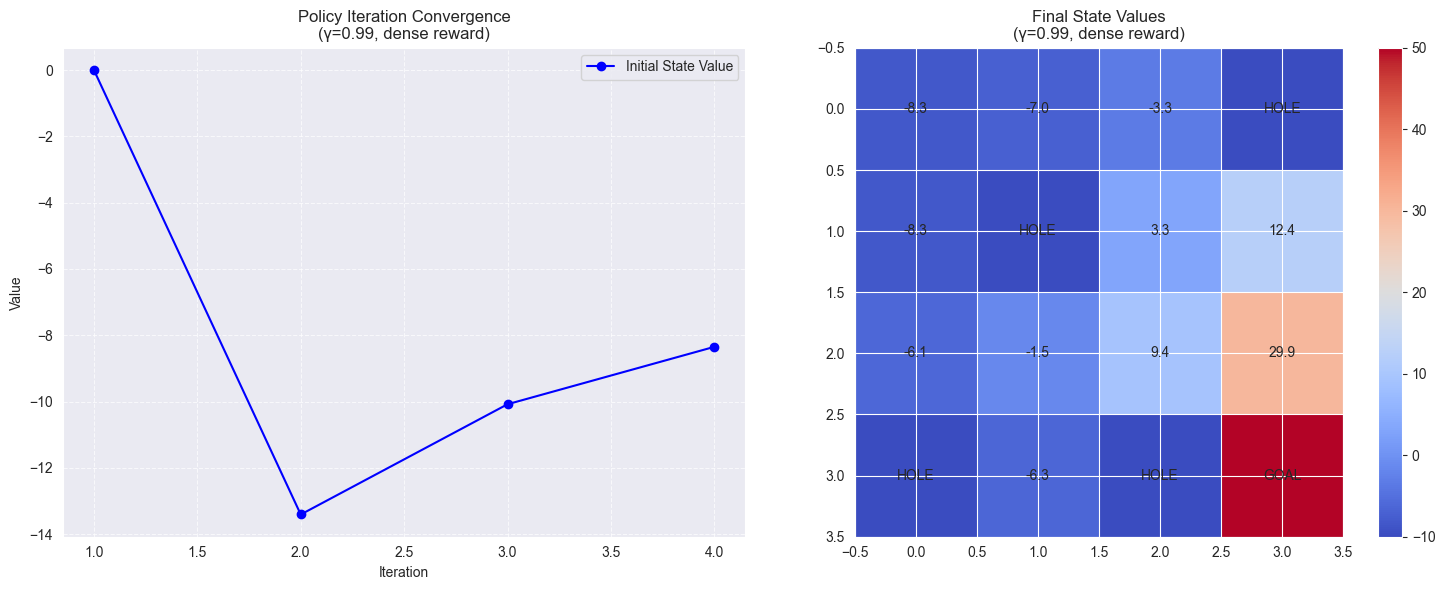

0.253598 Sec


In [14]:
import time
env = FrozenLakeEnv()

print("========== Sparse reward ==========")
print("Gamma: 0.9")
start_time = time.time()
sparse_pi_09, sparse_V_09, _ = PolicyIteration(env, gamma=0.9, reward_type='sparse').policy_iteration(plot_verbose=True)
end_time = time.time()
print(f"{end_time - start_time:.6f} Sec")
print("Gamma: 0.99")
start_time = time.time()
sparse_pi_099, sparse_V_099, _ = PolicyIteration(env, gamma=0.99, reward_type='sparse').policy_iteration(plot_verbose=True)
end_time = time.time()
print(f"{end_time - start_time:.6f} Sec")


print("\n========== Dense reward ==========")
print("Gamma: 0.9")
start_time = time.time()
dense_pi_09, dense_V_09, _ = PolicyIteration(env, gamma=0.9, reward_type='dense').policy_iteration(plot_verbose=True)
end_time = time.time()
print(f"{end_time - start_time:.6f} Sec")
print("Gamma: 0.99")
start_time = time.time()
dense_pi_099, dense_V_099, _ = PolicyIteration(env, gamma=0.99, reward_type='dense').policy_iteration(plot_verbose=True)
end_time = time.time()
print(f"{end_time - start_time:.6f} Sec")


**3.Compare the speed of convergence for different discount factors and sparse and dense rewards. What is the best value of discount factor? Which reward function does converge faster? Why? [4 Marks]**

We compared the speed of policy convergence with different discount rates (γ) and reward functions, and found that convergence tended to be faster with a discount rate of 0.9%. This is because a lower discount rate emphasizes immediate rewards over future rewards. In other words, with a discount rate of 0.9, the current state reward is more important in the policy evaluation process, allowing the optimal policy to be found quickly. On the other hand, when the discount rate is 0.99, the convergence rate tends to be somewhat slower because more iterations are needed to consider future rewards.

However, there was little difference in convergence speed between the Sparse Reward and Dense Reward environments. Both environments converged after three to four iterations, depending on the discount rate, and it is difficult to conclude that one reward structure consistently converged faster than the other. This is likely due to the small size of the Frozen Lake environment and the limited state space, so differences in reward structure did not have a significant impact on the speed of policy convergence. We believe that the differences between sparse and dense rewards will become clearer in more complex environments.

Also, we chose 0.99 as the best discount factor because it has the highest value function value as shown in 5.

**4.Apply the greedy policy returned by the algorithm with best $\gamma$ in the Frozen Lake environment.[hint: use step(action) function you have implemented in the previous section.] [4 Marks]**

In [15]:
def test_optimal_policy_policy_iteration(n_episodes=10000, reward_type='sparse'):
    env = FrozenLakeEnv()
    
    # Get optimal policy using γ=0.99 (best discount factor)
    pi = PolicyIteration(env, gamma=0.99, reward_type=reward_type)
    optimal_policy, _, _ = pi.policy_iteration()
    
    # Statistics
    successes = 0
    total_rewards = 0
    total_steps = 0
    
    # Run episodes
    for episode in range(n_episodes):
        state = env.reset()
        episode_reward = 0
        steps = 0
        
        while True:
            action = optimal_policy[state]
            next_state, reward, _, terminated = env.step(action)
            
            episode_reward += reward
            steps += 1
            
            if terminated:
                if next_state == env.goal_pos:
                    successes += 1
                break
                
            state = next_state
            
        total_rewards += episode_reward
        total_steps += steps
    
    # Calculate statistics
    success_rate = (successes / n_episodes) * 100
    avg_reward = total_rewards / n_episodes
    avg_steps = total_steps / n_episodes
    
    print("\nPerformance over", n_episodes, "episodes:")
    print(f"Success Rate: {success_rate:.2f}%")
    print(f"Average Reward: {avg_reward:.2f}")
    print(f"Average Steps: {avg_steps:.2f}")
    
    # Demonstrate one episode
    print("\nDemonstrating one episode with optimal policy:")
    state = env.reset()
    step_count = 0
    
    while True:
        # Print current state
        print(f"\nStep {step_count}:")
        for i in range(4):
            for j in range(4):
                if (i,j) == state:
                    print("P", end=" ")  # Player
                elif (i,j) == env.goal_pos:
                    print("G", end=" ")  # Goal
                elif (i,j) in env.holes_pos:
                    print("H", end=" ")  # Hole
                else:
                    print("F", end=" ")  # Frozen
            print()
            
        # Take action
        action = optimal_policy[state]
        print(f"Action taken: {action}")
        
        # Execute action
        next_state, reward, _, terminated = env.step(action)
        step_count += 1
        
        if terminated:
            # Print final state
            print(f"\nFinal Step {step_count}:")
            for i in range(4):
                for j in range(4):
                    if (i,j) == next_state:
                        print("P", end=" ")
                    elif (i,j) == env.goal_pos:
                        print("G", end=" ")
                    elif (i,j) in env.holes_pos:
                        print("H", end=" ")
                    else:
                        print("F", end=" ")
                print()
                
            if next_state == env.goal_pos:
                print("Episode ended successfully! Reached the goal!")
            else:
                print("Episode ended in failure. Fell into a hole.")
            print(f"Final reward: {reward}")
            break
            
        state = next_state

# Run the test
test_optimal_policy_policy_iteration(reward_type='sparse')

Iteration: 1, init_value: 0.0
Iteration: 2, init_value: -8.256927856376679
Iteration: 3, init_value: -4.136401252299897

::: Greedy policy :::
 →   →   ↓   H  
 ↓   H   →   ↓  
 →   →   →   ↓  
 H   ↑   H   G  

::: Value :::
-4.136 | -3.728 | -0.411 |   -10 | 
-5.078 |   -10 | 6.083 | 14.639 | 
-3.14 | 1.246 | 11.958 | 31.583 | 
  -10 | -4.383 |   -10 |    50 | 

Performance over 10000 episodes:
Success Rate: 9.96%
Average Reward: -4.02
Average Steps: 5.29

Demonstrating one episode with optimal policy:

Step 0:
P F F H 
F H F F 
F F F F 
H F H G 
Action taken: RIGHT

Step 1:
F P F H 
F H F F 
F F F F 
H F H G 
Action taken: RIGHT

Final Step 2:
F F F H 
F P F F 
F F F F 
H F H G 
Episode ended in failure. Fell into a hole.
Final reward: -10


5.Plot the value function of the last iteration for the different settings of discount factor and reward funtion. [hint: x-axis is a state, y-axis is the value of that state] [2 Marks]

Iteration: 1, init_value: 0.0
Iteration: 2, init_value: -5.766280416103994
Iteration: 3, init_value: -4.124642497036618
Iteration: 4, init_value: -4.0914993597508165
Iteration: 1, init_value: 0.0
Iteration: 2, init_value: -8.256927856376679
Iteration: 3, init_value: -4.136401252299897
Iteration: 1, init_value: 0.0
Iteration: 2, init_value: -9.483596115397273
Iteration: 3, init_value: -7.384607847090027
Iteration: 1, init_value: 0.0
Iteration: 2, init_value: -13.40514079696896
Iteration: 3, init_value: -10.079377215529172
Iteration: 4, init_value: -8.348157838385495


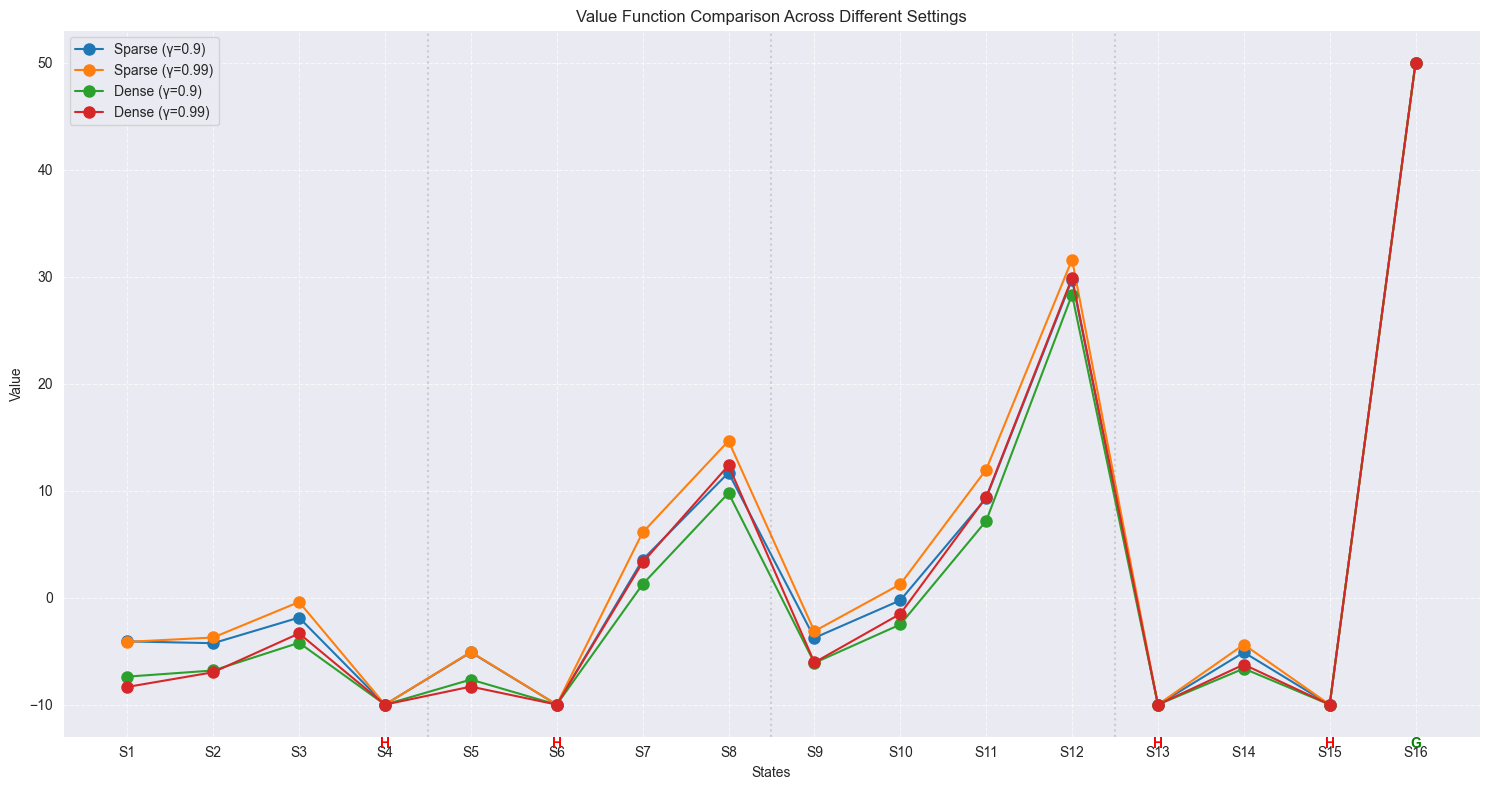

In [16]:
def plot_overlapped_value_comparison_policy_iteration():
   env = FrozenLakeEnv()
   configurations = {
       'Sparse (γ=0.9)': (0.9, 'sparse'),
       'Sparse (γ=0.99)': (0.99, 'sparse'),
       'Dense (γ=0.9)': (0.9, 'dense'),
       'Dense (γ=0.99)': (0.99, 'dense')
   }
   
   # Create figure
   plt.figure(figsize=(15, 8))
   
   # Get final values for each configuration
   for label, (gamma, reward_type) in configurations.items():
       pi = PolicyIteration(env, gamma=gamma, reward_type=reward_type)
       _, values, _ = pi.policy_iteration(verbose=False)
       
       # Convert states to indices for x-axis
       states = []
       state_values = []
       for i in range(4):
           for j in range(4):
               state = (i, j)
               states.append(i * 4 + j)  # Convert (i,j) to linear index
               state_values.append(values[state])
       
       plt.plot(states, state_values, marker='o', label=label, linestyle='-', markersize=8)
   
   # Customize plot
   plt.xlabel('States')
   plt.ylabel('Value')
   plt.title('Value Function Comparison Across Different Settings')
   plt.grid(True, linestyle='--', alpha=0.7)
   plt.legend()
   
   # Set x-ticks to state numbers
   plt.xticks(range(16), [f'S{i+1}' for i in range(16)])
   
   # Mark special states
   holes = [(0,3), (1,1), (3,0), (3,2)]
   hole_indices = [i * 4 + j for i, j in holes]
   goal_index = 15
   
   # Add annotations for holes and goal
   for idx in hole_indices:
       plt.text(idx, plt.ylim()[0], 'H', ha='center', va='top', color='red', fontweight='bold')
   plt.text(goal_index, plt.ylim()[0], 'G', ha='center', va='top', color='green', fontweight='bold')
   
   # Add vertical lines to separate grid rows
   for i in range(1, 4):
       plt.axvline(x=i*4 - 0.5, color='gray', linestyle=':', alpha=0.3)
   
   plt.tight_layout()
   plt.show()

# Generate the plot
plot_overlapped_value_comparison_policy_iteration()

### 1.3 Value Interation Implementation [32 Marks]

In this section, you are asked to implement the value iteration algorithm.

1.Implement the value iteration algorithm by filling the missing functions in the $\texttt{ValueIteration}$ class in the attached notebook. [16 Marks]

In [17]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

class ValueIteration:
    def __init__(self, env , gamma, reward_type="sparse"):
        # initialize the domain and discount factor
        self.pi = dict()
        self.env = env
        self.gamma = gamma
        self.reward_type = reward_type
        self.directions = {
            'LEFT': '←',
            'RIGHT': '→',
            'UP': '↑',
            'DOWN': '↓'
        }

    ## dictionary data form for value table recommended, but feel free to use any format for v
    def initialize_values(self):
        # you need to initialize the value function V_0[s] = 0 for all states
        # implement V as a dictionary that maps states to values - this will guarantee constant-time reading and writing
        self.V = {
            state: 0 for state in self.env.states
        }
        self.V_old = None


    def compute_backup(self, state, action):
        # use this as a helper function to return the necessaryquantity E{R(s, a, S’) + gamma * V_k[S’]} in value iteration
        if state in self.env.holes_pos:
            return HOLE 
        elif state == self.env.goal_pos:
            return GOAL
        
        all_probs = {
            next_state: self.env.pr(state, action, next_state) 
            for next_state in self.env.states
        }
        
        expected_value = 0.0
        for next_state, prob in all_probs.items():
            if prob > 0:
                if self.reward_type == 'sparse':
                    reward = self.env.sparse_reward(state, action, next_state)
                elif self.reward_type == 'dense':
                    reward = self.env.dense_reward(state, action, next_state)
                is_terminal = next_state in self.env.holes_pos or next_state == self.env.goal_pos
                expected_value += prob * (reward + (0 if is_terminal else self.gamma * self.V[next_state]))
                
        return expected_value


    def greedy_action(self, state):
        # use the previous function compute_backup to return the (deterministic) greedy policy pi[a | s] derived from V

        best_action = None
        best_value = -np.inf

        valid_actions = self.env.actions_space(state)

        for action in valid_actions:
            action_value = self.compute_backup(state, action)
            if action_value > best_value:
                best_value = action_value
                best_action = action

        return best_action 


    def update_values(self):
        # this method updates the value function for one iteration., e.g. V_{k}[s] -> V_{k+1}[s] over all s
        # it's helpful that we have V stored as one entity of value iteration object(again, just a recommendation)
        self.V_old = self.V.copy()

        for state in self.env.states:
            
            if state in self.env.holes_pos:
                self.V[state] = HOLE 
                continue
            if state == self.env.goal_pos:
                self.V[state] = GOAL 
                continue
            
            valid_action = self.env.actions_space(state)
            valid_reward = [self.compute_backup(state, action) for action in valid_action]

            self.V[state] = max(valid_reward) 

    def value_iteration(self, tolerance=1e-6, verbose=False, plot_verbose=False):
        # use this to implement the complete value iteration
        # algorithm - you should make use of the procedures initialize_values and update_values that you have written above
        # stop your iterations when the difference between V_{k+1} (self.V) and V_k (self.V_old) is less than tolerance
        # this method does not need to return anything since the
        # final V_k should be in self.V
        # store , and when converged plot , the backed -up value
        # function at the initial state of the MDP according to
        # the greedy policy derived from V_k as a function of k
        # also, print the final greedy policy in the console ...

        self.initialize_values()

        num_iter = 0
        total_values = []

        while True:
            
            num_iter += 1
            delta = 0

            if verbose:
                print(f"Iteration: {num_iter}, init_value: {self.V[self.env.cur_state]}")

            total_values.append(self.V[self.env.cur_state])
            self.update_values()
            
            for state in self.env.states:
                delta = max(delta, abs(self.V_old[state] - self.V[state]))

            if delta < tolerance:
                break
        for state in self.env.states:
            if state not in self.env.holes_pos and state != self.env.goal_pos:
                self.pi[state] = self.greedy_action(state)


        if verbose:
            print("\n::: Policy :::")
            for r in range(4):
                for c in range(4):
                    if (r, c) in self.env.holes_pos:
                        print(" H ", end=" ")
                    elif (r, c) == self.env.goal_pos:
                        print(" G ", end=" ")
                    else:
                        action = self.pi.get((r, c))
                        if action:
                            print(f" {self.directions[action]} ", end=" ")
                print()
    
            print('\n::: Value :::')
            for r in range(4):
                for c in range(4):
                    value = self.V.get((r, c), None)
                    print(f"{np.round(value, 3):>5}", end=" | ")
                print()

        # Visualization
        if plot_verbose:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

            # Convergence plot
            ax1.plot(range(1, len(total_values) + 1), total_values, 'b-o', label="Initial State Value")
            ax1.set_xlabel("Iteration")
            ax1.set_ylabel("Value")
            ax1.set_title(f"Policy Iteration Convergence\n(γ={self.gamma}, {self.reward_type} reward)")
            ax1.grid(True, linestyle='--', alpha=0.7)
            ax1.legend()

            # Final state values heatmap
            values_matrix = np.zeros((4, 4))
            for r in range(4):
                for c in range(4):
                    values_matrix[r, c] = self.V.get((r, c), 0)

            im = ax2.imshow(values_matrix, cmap='coolwarm')
            plt.colorbar(im, ax=ax2)

            # Add value annotations
            for r in range(4):
                for c in range(4):
                    text = f"{values_matrix[r, c]:.1f}"
                    if (r, c) in self.env.holes_pos:
                        text = "HOLE"
                    elif (r, c) == self.env.goal_pos:
                        text = "GOAL"
                    ax2.text(c, r, text, ha='center', va='center')

            ax2.set_title(f'Final State Values\n(γ={self.gamma}, {self.reward_type} reward)')

            plt.tight_layout()
            plt.show()
        else:
            pass


        return self.pi, self.V, num_iter
        


2.Run the algorithm in the $\texttt{FrozenLakeEnv}$ using both sparse_reward and dense_reward with these two discount factors $\gamma \in \{0.9, 0.99\}$. Use $\Delta=1e^{-6}$ as tolerance. [6 Marks]

========== Sparse reward ==========
Gamma: 0.9
Iteration: 1, init_value: 0
Iteration: 2, init_value: 0.0
Iteration: 3, init_value: -2.25
Iteration: 4, init_value: -3.78140625
Iteration: 5, init_value: -4.711635878906249
Iteration: 6, init_value: -5.323551387174316
Iteration: 7, init_value: -4.988609784392363
Iteration: 8, init_value: -4.573451715315553
Iteration: 9, init_value: -4.32311321934262
Iteration: 10, init_value: -4.196847237987368
Iteration: 11, init_value: -4.1378775857802985
Iteration: 12, init_value: -4.111412192925587
Iteration: 13, init_value: -4.099799102851443
Iteration: 14, init_value: -4.094770955452422
Iteration: 15, init_value: -4.092611634407293
Iteration: 16, init_value: -4.091689025332112
Iteration: 17, init_value: -4.091296082363806
Iteration: 18, init_value: -4.091129064753786
Iteration: 19, init_value: -4.091058166395394
Iteration: 20, init_value: -4.091028094979765
Iteration: 21, init_value: -4.091015346919631
Iteration: 22, init_value: -4.091009944492388
It

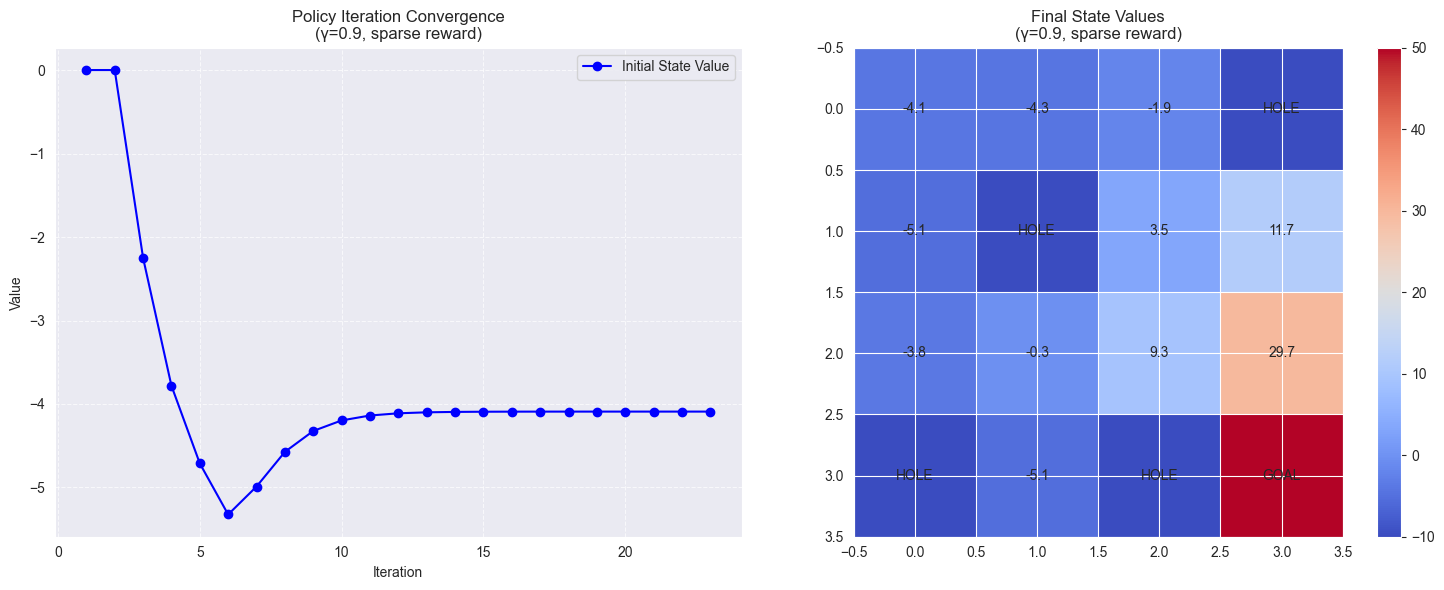

0.246717 Sec
Gamma: 0.99
Iteration: 1, init_value: 0
Iteration: 2, init_value: 0.0
Iteration: 3, init_value: -2.4749999999999996
Iteration: 4, init_value: -4.45204546875
Iteration: 5, init_value: -5.859474212360742
Iteration: 6, init_value: -6.925020871745472
Iteration: 7, init_value: -6.317566817509144
Iteration: 8, init_value: -5.503028561582229
Iteration: 9, init_value: -4.918323288878821
Iteration: 10, init_value: -4.563641026864897
Iteration: 11, init_value: -4.363803444030756
Iteration: 12, init_value: -4.2554598392252405
Iteration: 13, init_value: -4.197989549621511
Iteration: 14, init_value: -4.167898478580739
Iteration: 15, init_value: -4.152267841501479
Iteration: 16, init_value: -4.144188703680447
Iteration: 17, init_value: -4.140025760033785
Iteration: 18, init_value: -4.13788494337283
Iteration: 19, init_value: -4.136785396374254
Iteration: 20, init_value: -4.136221108237802
Iteration: 21, init_value: -4.135931663054211
Iteration: 22, init_value: -4.1357832438842355
Iterat

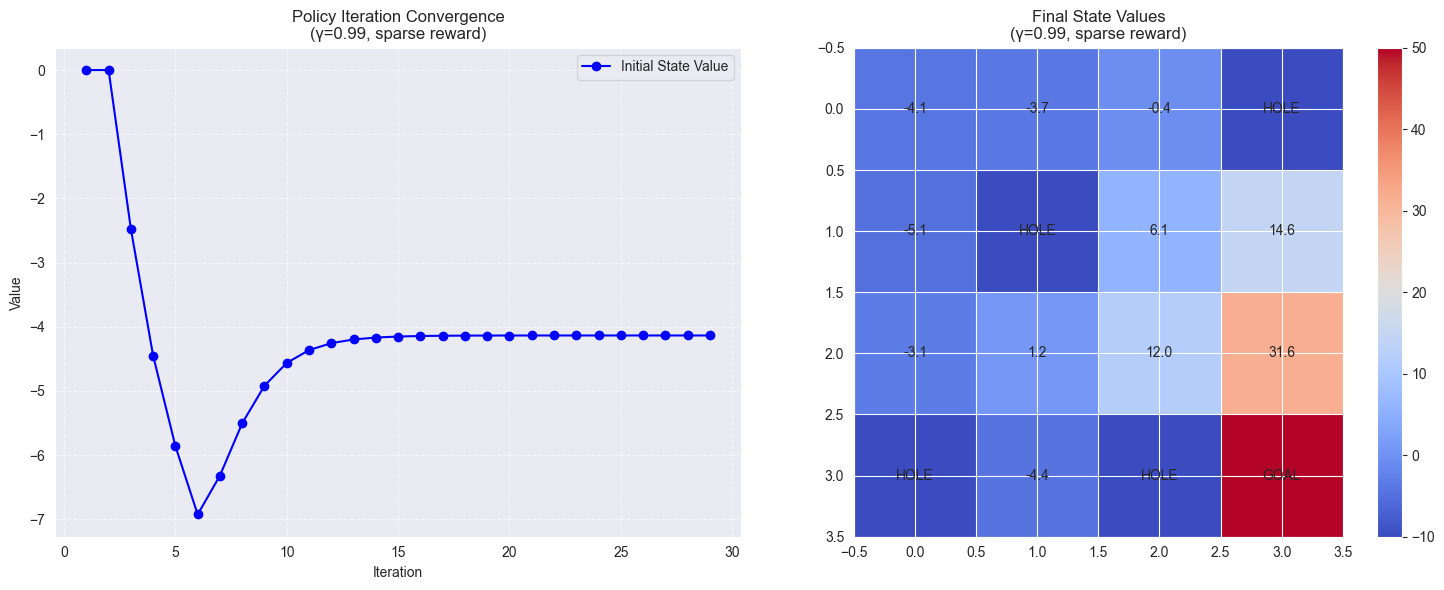

0.310606 Sec

========== Dense reward ==========
Gamma: 0.9
Iteration: 1, init_value: 0
Iteration: 2, init_value: -1.0
Iteration: 3, init_value: -4.1274999999999995
Iteration: 4, init_value: -6.393728124999999
Iteration: 5, init_value: -7.72466057734375
Iteration: 6, init_value: -8.618351096493612
Iteration: 7, init_value: -8.237311029320832
Iteration: 8, init_value: -7.8363505774664
Iteration: 9, init_value: -7.600367833276833
Iteration: 10, init_value: -7.4824187761544145
Iteration: 11, init_value: -7.427577561309347
Iteration: 12, init_value: -7.403025115908772
Iteration: 13, init_value: -7.392266846648207
Iteration: 14, init_value: -7.3876128554170535
Iteration: 15, init_value: -7.385615288753691
Iteration: 16, init_value: -7.384762079964386
Iteration: 17, init_value: -7.3843987723416
Iteration: 18, init_value: -7.384244371947817
Iteration: 19, init_value: -7.3841788352123325
Iteration: 20, init_value: -7.384151039453294
Iteration: 21, init_value: -7.384139256519266
Iteration: 22, 

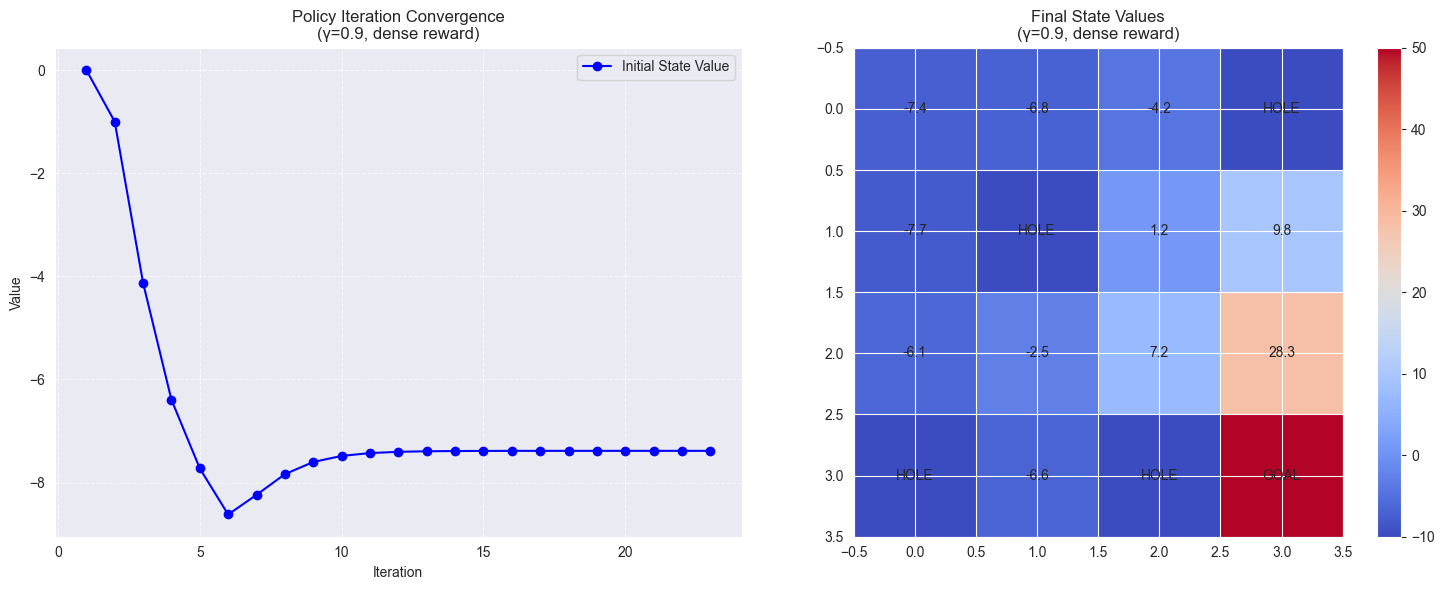

0.245213 Sec
Gamma: 0.99
Iteration: 1, init_value: 0
Iteration: 2, init_value: -1.0
Iteration: 3, init_value: -4.462524999999999
Iteration: 4, init_value: -7.3277952821875
Iteration: 5, init_value: -9.257771806396054
Iteration: 6, init_value: -10.740569404068882
Iteration: 7, init_value: -10.2642402613009
Iteration: 8, init_value: -9.559408969395578
Iteration: 9, init_value: -9.044085661202455
Iteration: 10, init_value: -8.729235999691829
Iteration: 11, init_value: -8.551212909262729
Iteration: 12, init_value: -8.454508630919115
Iteration: 13, init_value: -8.403154216304362
Iteration: 14, init_value: -8.376246959527906
Iteration: 15, init_value: -8.362264225731984
Iteration: 16, init_value: -8.355034941004131
Iteration: 17, init_value: -8.35130927995294
Iteration: 18, init_value: -8.349393135404796
Iteration: 19, init_value: -8.348408916160615
Iteration: 20, init_value: -8.347903792585491
Iteration: 21, init_value: -8.34764468807946
Iteration: 22, init_value: -8.347511824405647
Iterati

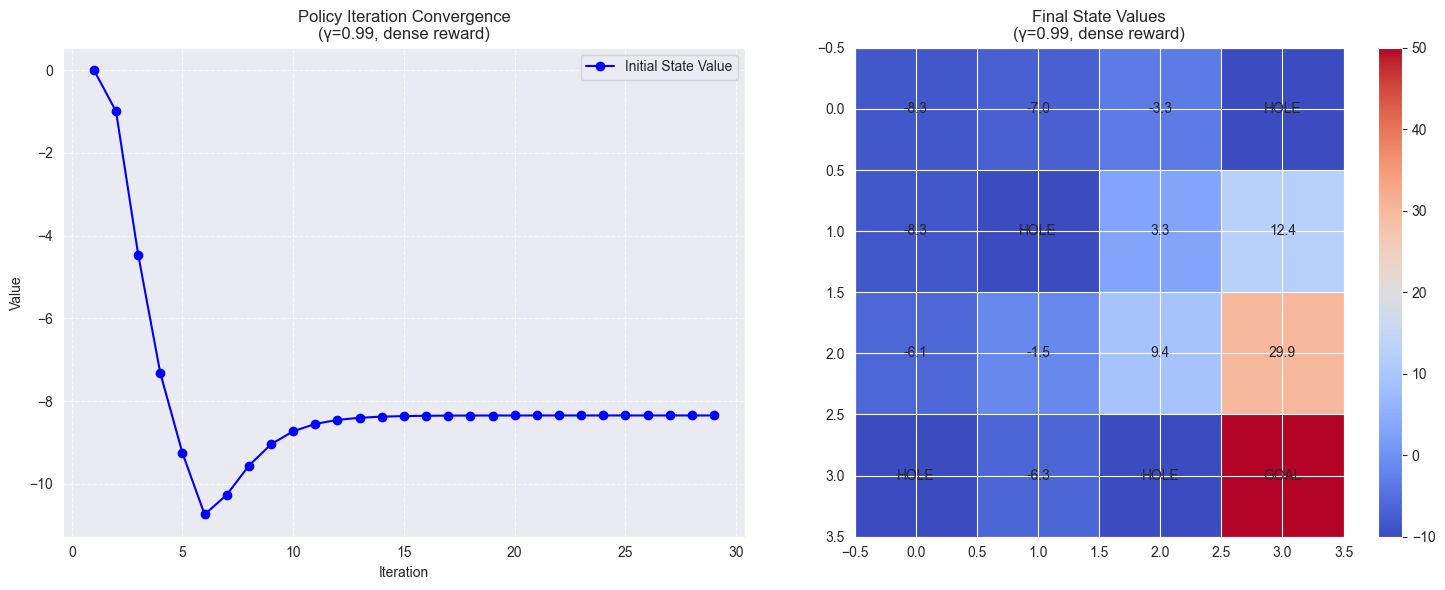

0.257598 Sec


In [18]:
env = FrozenLakeEnv()

print("========== Sparse reward ==========")
print("Gamma: 0.9")
start_time = time.time()
vi, V, _ = ValueIteration(env, gamma=0.9, reward_type='sparse').value_iteration(verbose=True, plot_verbose=True)
end_time = time.time()
print(f"{end_time - start_time:.6f} Sec")
print("Gamma: 0.99")
start_time = time.time()
vi, V, _ = ValueIteration(env, gamma=0.99, reward_type='sparse').value_iteration(verbose=True, plot_verbose=True)
end_time = time.time()
print(f"{end_time - start_time:.6f} Sec")


print("\n========== Dense reward ==========")
print("Gamma: 0.9")
start_time = time.time()
vi, V, _ = ValueIteration(env, gamma=0.9, reward_type='dense').value_iteration(verbose=True, plot_verbose=True)
end_time = time.time()
print(f"{end_time - start_time:.6f} Sec")
print("Gamma: 0.99")
start_time = time.time()
vi, V, _ = ValueIteration(env, gamma=0.99, reward_type='dense').value_iteration(verbose=True, plot_verbose=True)
end_time = time.time()
print(f"{end_time - start_time:.6f} Sec")


**3.Compare the speed of convergence for different discount factors and sparse and dense rewards. What is the best value of discount factor? Which reward function does converge faster? Why? [4 Marks]**

When comparing different discount factors, convergence was faster for a discount factor of 0.9, with an average time of 0.24595, compared to 0.99, which had an average time of 0.28405. This is because smaller discount factors prioritize immediate rewards, while larger discount factors focus on maximizing long-term rewards, which takes longer to converge.

For the reward function, sparse rewards took an average of 0.27865 seconds to converge, while dense rewards took an average of 0.25135 seconds. This is because dense rewards provide more frequent feedback, allowing the agent to learn faster.

In our opinion, the best discount factor is 0.99, which has a slower learning time, but seeks long-term rewards and has a larger value in the final value function, as shown in Figure 5

4.Apply the greedy policy returned by the algorithm with best $\gamma$ in the Frozen Lake environment. [hint: use step(action) function you have implemented in the previous section.] [4 Marks]

In [19]:
def test_optimal_policy_value_iteration(n_episodes=1000):
    env = FrozenLakeEnv()
    
    # Get optimal policy using γ=0.99 (best discount factor)
    vi = ValueIteration(env, gamma=0.99, reward_type='sparse')
    optimal_policy, _, _ = vi.value_iteration()
    
    # Statistics
    successes = 0
    total_rewards = 0
    total_steps = 0
    
    # Run episodes
    for episode in range(n_episodes):
        state = env.reset()
        episode_reward = 0
        steps = 0
        
        while True:
            action = optimal_policy[state]
            next_state, reward, _, terminated = env.step(action)
            
            episode_reward += reward
            steps += 1
            
            if terminated:
                if next_state == env.goal_pos:
                    successes += 1
                break
                
            state = next_state
            
        total_rewards += episode_reward
        total_steps += steps
        
    # Calculate statistics
    success_rate = (successes / n_episodes) * 100
    avg_reward = total_rewards / n_episodes
    avg_steps = total_steps / n_episodes
    
    print("\nPerformance over", n_episodes, "episodes:")
    print(f"Success Rate: {success_rate:.2f}%")
    print(f"Average Reward: {avg_reward:.2f}")
    print(f"Average Steps: {avg_steps:.2f}")
    
    # Demonstrate one episode
    print("\nDemonstrating one episode with optimal policy:")
    state = env.reset()
    step_count = 0
    
    while True:
        # Print current state
        print(f"\nStep {step_count}:")
        for i in range(4):
            for j in range(4):
                if (i,j) == state:
                    print("P", end=" ")  # Player
                elif (i,j) == env.goal_pos:
                    print("G", end=" ")  # Goal
                elif (i,j) in env.holes_pos:
                    print("H", end=" ")  # Hole
                else:
                    print("F", end=" ")  # Frozen
            print()
        # Take action
        action = optimal_policy[state]
        print(f"Action taken: {action}")
        
        # Execute action
        next_state, reward, _, terminated = env.step(action)
        step_count += 1
        
        if terminated:
            # Print final state
            print(f"\nFinal Step {step_count}:")
            for i in range(4):
                for j in range(4):
                    if (i,j) == next_state:
                        print("P", end=" ")
                    elif (i,j) == env.goal_pos:
                        print("G", end=" ")
                    elif (i,j) in env.holes_pos:
                        print("H", end=" ")
                    else:
                        print("F", end=" ")
                print()
                
            if next_state == env.goal_pos:
                print("Episode ended successfully! Reached the goal!")
            else:
                print("Episode ended in failure. Fell into a hole.")
            print(f"Final reward: {reward}")
            break
            
        state = next_state

# Run the test
test_optimal_policy_value_iteration()


Performance over 1000 episodes:
Success Rate: 7.90%
Average Reward: -5.26
Average Steps: 5.25

Demonstrating one episode with optimal policy:

Step 0:
P F F H 
F H F F 
F F F F 
H F H G 
Action taken: RIGHT

Step 1:
F P F H 
F H F F 
F F F F 
H F H G 
Action taken: RIGHT

Step 2:
F F P H 
F H F F 
F F F F 
H F H G 
Action taken: DOWN

Step 3:
F P F H 
F H F F 
F F F F 
H F H G 
Action taken: RIGHT

Step 4:
F F P H 
F H F F 
F F F F 
H F H G 
Action taken: DOWN

Step 5:
F F F H 
F H P F 
F F F F 
H F H G 
Action taken: RIGHT

Step 6:
F F P H 
F H F F 
F F F F 
H F H G 
Action taken: DOWN

Final Step 7:
F F F P 
F H F F 
F F F F 
H F H G 
Episode ended in failure. Fell into a hole.
Final reward: -10


5.Plot the value function of the last iteration for the different settings of discount factor and reward funtion. [hint: x-axis is a state, y-axis is the value of that state.] [2 Marks]

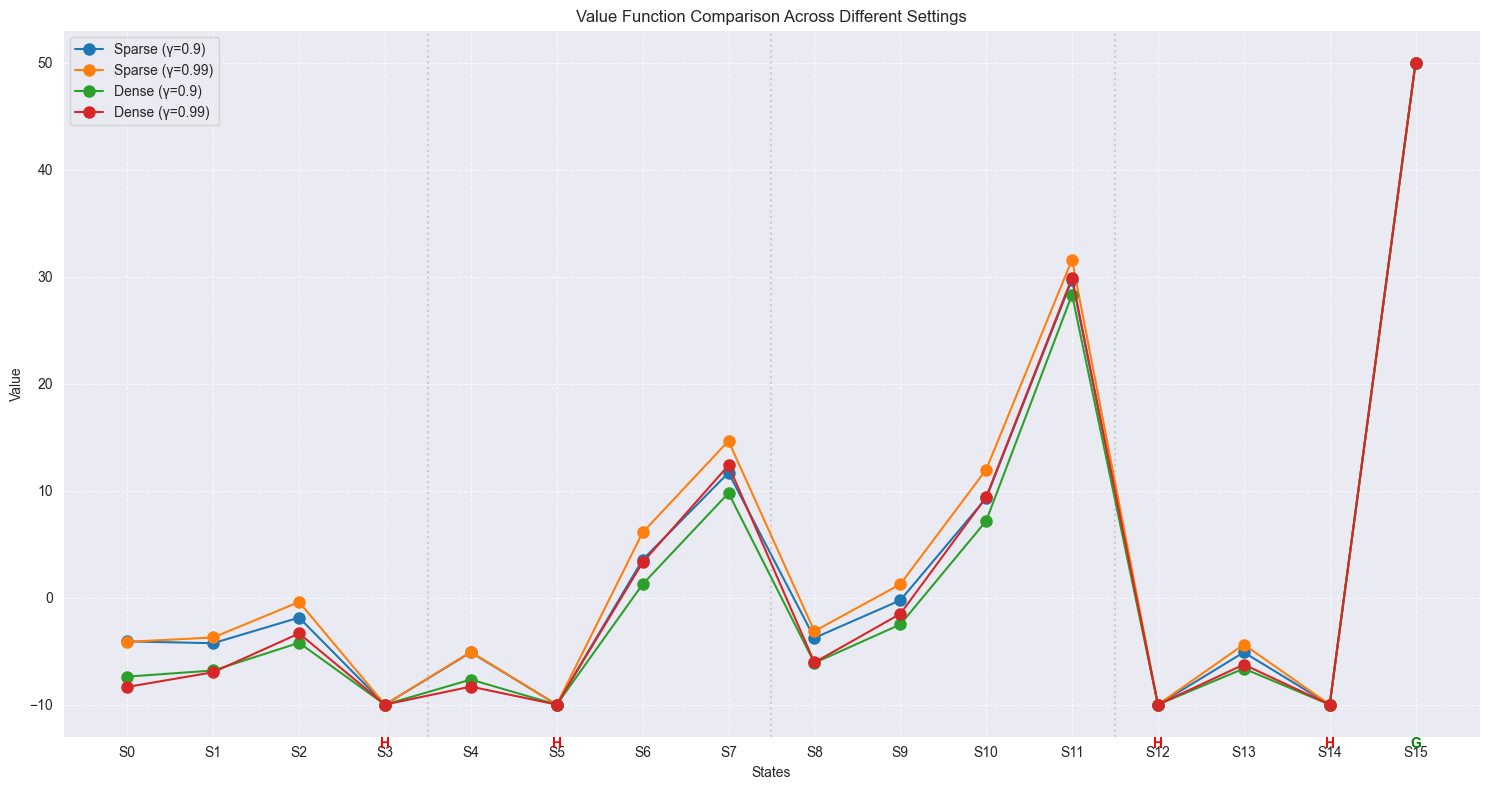

In [20]:
def plot_overlapped_value_comparison_value_iteration():
    env = FrozenLakeEnv()
    configurations = {
       'Sparse (γ=0.9)': (0.9, 'sparse'),
       'Sparse (γ=0.99)': (0.99, 'sparse'),
       'Dense (γ=0.9)': (0.9, 'dense'),
       'Dense (γ=0.99)': (0.99, 'dense')
    }
   
    # Create figure
    plt.figure(figsize=(15, 8))
   
    # Get final values for each configuration
    for label, (gamma, reward_type) in configurations.items():
        vi = ValueIteration(env, gamma=gamma, reward_type=reward_type)
        _, values, _ = vi.value_iteration()
       
        # Convert states to indices for x-axis
        states = []
        state_values = []
        for i in range(4):
            for j in range(4):
                state = (i, j)
                states.append(i * 4 + j)  # Convert (i,j) to linear index
                state_values.append(values[state])
       
        plt.plot(states, state_values, marker='o', label=label, linestyle='-', markersize=8)
   
    # Customize plot
    plt.xlabel('States')
    plt.ylabel('Value')
    plt.title('Value Function Comparison Across Different Settings')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
   
    # Set x-ticks to state numbers
    plt.xticks(range(16), [f'S{i}' for i in range(16)])
   
    # Mark special states
    holes = [(0,3), (1,1), (3,0), (3,2)]
    hole_indices = [i * 4 + j for i, j in holes]
    goal_index = 15
   
    # Add annotations for holes and goal
    for idx in hole_indices:
        plt.text(idx, plt.ylim()[0], 'H', ha='center', va='top', color='red', fontweight='bold')
    plt.text(goal_index, plt.ylim()[0], 'G', ha='center', va='top', color='green', fontweight='bold')
   
    # Add vertical lines to separate grid rows
    for i in range(1, 4):
        plt.axvline(x=i*4 - 0.5, color='gray', linestyle=':', alpha=0.3)
   
    plt.tight_layout()
    plt.show()

# Generate the plot
plot_overlapped_value_comparison_value_iteration()

### 1.4 Comparing Algorithms [12 Marks]

Here, you are asked to compare the policy and value iteration algorithms in terms of time and memory consumption.
For assessing time consumption you can use %timeit in jupyter notebook. For assessing memory consumption,
explain the size of data structures you have used according to the state and action spaces dimension. Use plot or
table to indicate time and number of iteration of each algorithm. [12 Marks]

In [21]:
import time

def compare_time(env):
    print("Running Policy Iteration...")
    start_time = time.time()
    pi = PolicyIteration(env, gamma=0.99)
    pi.policy_iteration(tolerance=1e-6)
    policy_iteration_time = time.time() - start_time

    print("Running Value Iteration...")
    start_time = time.time()
    vi = ValueIteration(env, gamma=0.99)
    vi.value_iteration(tolerance=1e-6)
    value_iteration_time = time.time() - start_time

    return policy_iteration_time, value_iteration_time


def calculate_memory(env):
    state_space = len(env.states_space())
    action_space = len(env.actions)

    memory = {
        "Value Function (V)": state_space * 8,
        "Policy (π)": state_space * 4,
        "Action Values": state_space * action_space * 8
    }
    total_memory = sum(memory.values())
    memory["Total"] = total_memory

    return memory


def visualize_results(policy_time, value_time, policy_iterations, value_iterations, memory_usage):
    plt.figure(figsize=(12, 5))

    # compare the time
    plt.subplot(1, 2, 1)
    plt.bar(["Policy Iteration", "Value Iteration"], [policy_time, value_time], color=["blue", "orange"])
    plt.ylabel("Time (seconds)")
    plt.title("Time Consumption")

    # compare the convergence iterations
    plt.subplot(1, 2, 2)
    plt.bar(["Policy Iteration", "Value Iteration"], [policy_iterations, value_iterations], color=["blue", "orange"])
    plt.ylabel("Number of Iterations")
    plt.title("Convergence Iterations")

    plt.tight_layout()
    plt.show()

    print("\nMemory Consumption:")
    for key, value in memory_usage.items():
        print(f"{key}: {value / 1024:.2f} KB")

Running Policy Iteration...
Iteration: 1, init_value: 0.0
Iteration: 2, init_value: -8.258600857125568
Iteration: 3, init_value: -4.135628111264521

::: Greedy policy :::
 →   →   ↓   H  
 ↓   H   →   ↓  
 →   →   →   ↓  
 H   ↑   H   G  

::: Value :::
-4.136 | -3.727 | -0.411 |   -10 | 
-5.078 |   -10 | 6.083 | 14.639 | 
-3.14 | 1.246 | 11.958 | 31.583 | 
  -10 | -4.383 |   -10 |    50 | 
Running Value Iteration...
Iteration: 1, init_value: 0.0
Iteration: 2, init_value: -8.258600857125568
Iteration: 3, init_value: -4.135628111264521

::: Greedy policy :::
 →   →   ↓   H  
 ↓   H   →   ↓  
 →   →   →   ↓  
 H   ↑   H   G  

::: Value :::
-4.136 | -3.727 | -0.411 |   -10 | 
-5.078 |   -10 | 6.083 | 14.639 | 
-3.14 | 1.246 | 11.958 | 31.583 | 
  -10 | -4.383 |   -10 |    50 | 



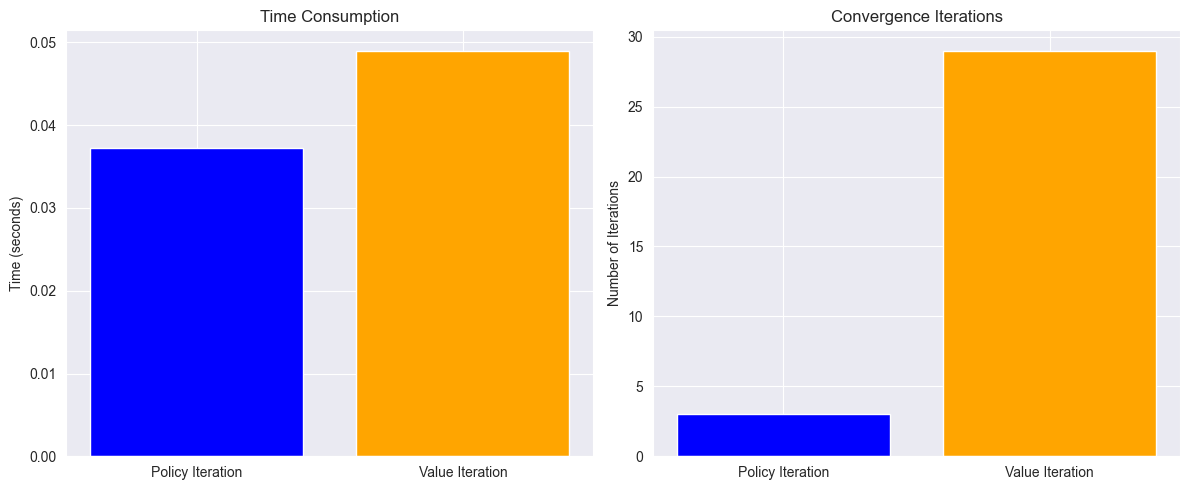


Memory Consumption:
Value Function (V): 0.12 KB
Policy (π): 0.06 KB
Action Values: 0.50 KB
Total: 0.69 KB


In [22]:
def main():
    env = FrozenLakeEnv()

    policy_time, value_time = compare_time(env)

    pi = PolicyIteration(env, gamma=0.99)
    _, policy_values, policy_iterations = pi.policy_iteration(tolerance=1e-6)

    vi = ValueIteration(env, gamma=0.99)
    _, value_values, value_iterations = vi.value_iteration(tolerance=1e-6)
    print()

    # memory usage
    memory_usage = calculate_memory(env)

    # visualization
    visualize_results(policy_time, value_time, policy_iterations, value_iterations, memory_usage)


if __name__ == "__main__":
    main()